# Predicting House Prices

In [302]:
#Importing all the required modules
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [316]:
#importing dataset
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
#Take a look at the dataset
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [4]:
#Name of Columns
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [5]:
#Are there any null values in the dataset
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
#describing the dataset
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House Age', ylabel='House price of unit area'>

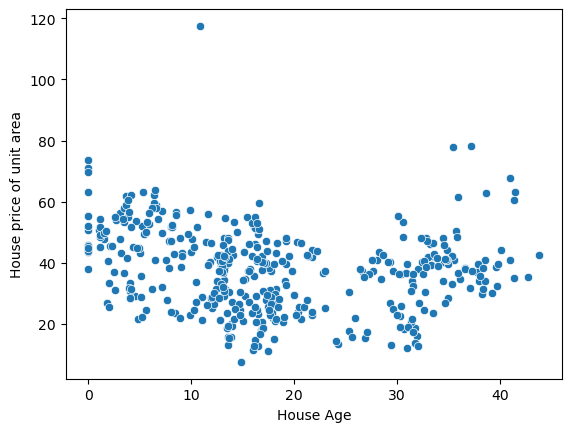

In [324]:
sns.scatterplot(df['House Age'], df['House price of unit area'])

Most of the house age are between 10 to 20, but there is no clear relation between House Age and Price

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='House price of unit area'>

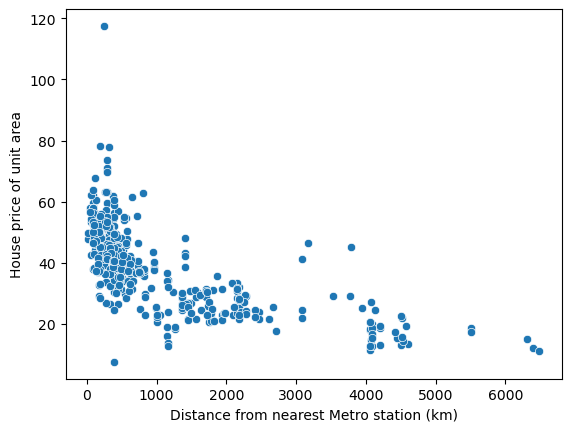

In [10]:
sns.scatterplot(df['Distance from nearest Metro station (km)'], df['House price of unit area'])

Most of the houses in 1000 km from the metro station, and there is a clear relation between price and distance from the metro station, as closer to the station higher the price

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of convenience stores', ylabel='House price of unit area'>

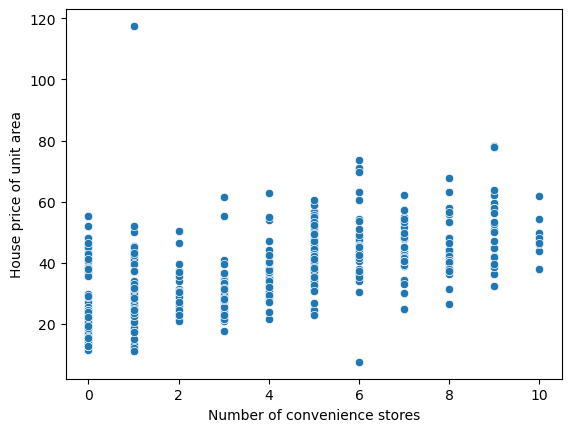

In [327]:
sns.scatterplot(df['Number of convenience stores'],df['House price of unit area'])

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

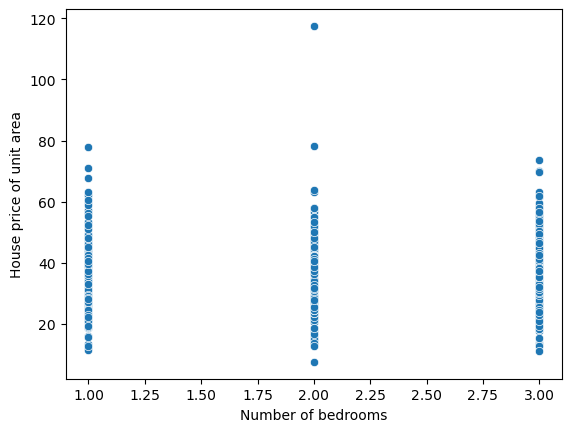

In [331]:
sns.scatterplot(df['Number of bedrooms'],df['House price of unit area'])

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House size (sqft)', ylabel='House price of unit area'>

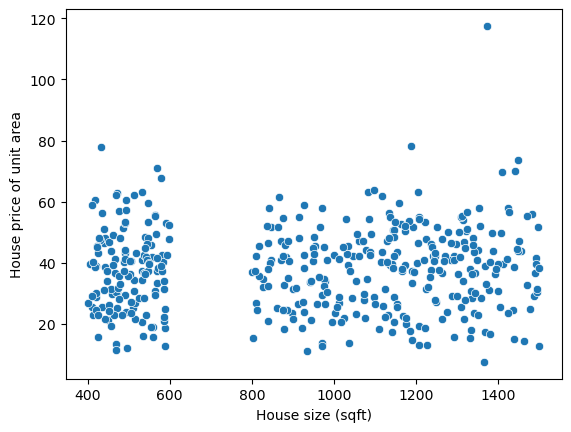

In [329]:
sns.scatterplot(df['House size (sqft)'],df['House price of unit area'])

From the above graphs we can say that there are no clear relation between house price, house size, number of convinence stores, or number of bedrooms.

<AxesSubplot:xlabel='House price of unit area', ylabel='Count'>

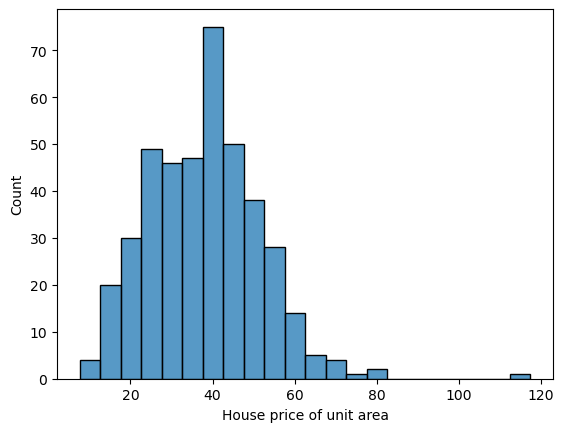

In [21]:
#Checking distribution of the target variable
sns.histplot(df['House price of unit area'])

<AxesSubplot:>

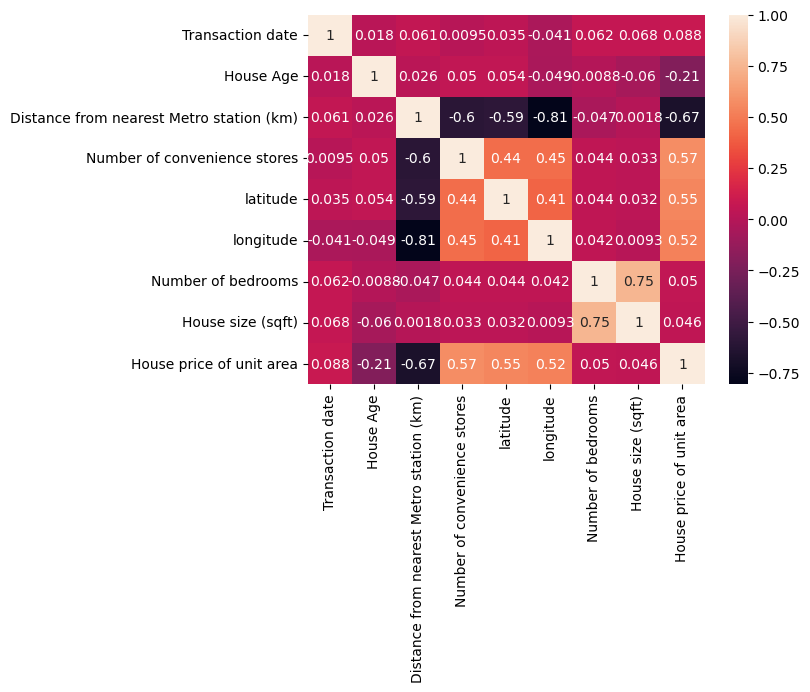

In [332]:
#Correlation matrix
sns.heatmap(df.corr(), annot=True)

From the above analysis we are making an assumption that the house price depends on the distance from the metro station, latitude and longitude

In [300]:
#Separating dependent and Independent variables and Normalizing Independent variables
X = df[['Distance from nearest Metro station (km)', 'latitude', 'longitude']]
X[['Distance from nearest Metro station (km)', 'latitude', 'longitude']] = normalize(
            X[['Distance from nearest Metro station (km)', 'latitude', 'longitude']])
y = df['House price of unit area']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 80)

In [303]:
cols = ['Model','MAE', 'MSE', 'RMSE', 'R2','Cross_val_score']

results_df = pd.DataFrame()

#Function to evaluate the model
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

#Function to fit the model and returning a df with model score
def result(model_name, model, results_df, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred) , 
                                            cross_val_score(model, X, y, cv=10).mean()]], columns=cols)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

In [304]:
#Calling all the required model
lin_reg = LinearRegression(normalize=True)
results_df = result("Linear Regression", lin_reg, results_df, y_test)

ridge = Ridge()
results_df = result("Ridge Regression", ridge, results_df, y_test)

lasso = Lasso()
results_df = result("Lasso Regression", lasso, results_df, y_test)

svm = SVR()
results_df = result("Support Vector",  svm, results_df, y_test)

randomforest = RandomForestRegressor()
results_df = result("Random Forest",  randomforest, results_df, y_test)


Learning rate set to 0.033651
0:	learn: 13.6888489	total: 1.47ms	remaining: 1.47s
1:	learn: 13.4743657	total: 2.49ms	remaining: 1.24s
2:	learn: 13.2501284	total: 3.53ms	remaining: 1.17s
3:	learn: 13.0457136	total: 4.54ms	remaining: 1.13s
4:	learn: 12.8538878	total: 5.56ms	remaining: 1.11s
5:	learn: 12.6727292	total: 6.78ms	remaining: 1.12s
6:	learn: 12.4939504	total: 7.97ms	remaining: 1.13s
7:	learn: 12.3142917	total: 9.18ms	remaining: 1.14s
8:	learn: 12.1575339	total: 10.4ms	remaining: 1.14s
9:	learn: 12.0017224	total: 11.4ms	remaining: 1.12s
10:	learn: 11.8508052	total: 12.4ms	remaining: 1.11s
11:	learn: 11.7042796	total: 13.5ms	remaining: 1.11s
12:	learn: 11.5689193	total: 14.6ms	remaining: 1.11s
13:	learn: 11.4429216	total: 15.6ms	remaining: 1.1s
14:	learn: 11.3232242	total: 16.7ms	remaining: 1.09s
15:	learn: 11.2134177	total: 17.7ms	remaining: 1.09s
16:	learn: 11.1026294	total: 18.8ms	remaining: 1.08s
17:	learn: 10.9988068	total: 19.8ms	remaining: 1.08s
18:	learn: 10.8976636	total

186:	learn: 7.9619129	total: 180ms	remaining: 782ms
187:	learn: 7.9543829	total: 181ms	remaining: 783ms
188:	learn: 7.9491029	total: 182ms	remaining: 782ms
189:	learn: 7.9381934	total: 183ms	remaining: 781ms
190:	learn: 7.9307505	total: 184ms	remaining: 780ms
191:	learn: 7.9278738	total: 185ms	remaining: 779ms
192:	learn: 7.9193505	total: 186ms	remaining: 778ms
193:	learn: 7.9131605	total: 187ms	remaining: 777ms
194:	learn: 7.8912417	total: 188ms	remaining: 777ms
195:	learn: 7.8814763	total: 189ms	remaining: 776ms
196:	learn: 7.8729223	total: 190ms	remaining: 775ms
197:	learn: 7.8542864	total: 191ms	remaining: 773ms
198:	learn: 7.8516099	total: 192ms	remaining: 772ms
199:	learn: 7.8378308	total: 193ms	remaining: 773ms
200:	learn: 7.8317950	total: 195ms	remaining: 773ms
201:	learn: 7.8277183	total: 196ms	remaining: 772ms
202:	learn: 7.8164005	total: 197ms	remaining: 772ms
203:	learn: 7.8132833	total: 198ms	remaining: 771ms
204:	learn: 7.8087905	total: 199ms	remaining: 770ms
205:	learn: 

385:	learn: 6.6506939	total: 361ms	remaining: 574ms
386:	learn: 6.6453040	total: 362ms	remaining: 573ms
387:	learn: 6.6382818	total: 363ms	remaining: 572ms
388:	learn: 6.6328334	total: 363ms	remaining: 571ms
389:	learn: 6.6236750	total: 364ms	remaining: 570ms
390:	learn: 6.6170454	total: 365ms	remaining: 569ms
391:	learn: 6.6080349	total: 366ms	remaining: 568ms
392:	learn: 6.6058890	total: 367ms	remaining: 566ms
393:	learn: 6.6033275	total: 368ms	remaining: 565ms
394:	learn: 6.5976843	total: 368ms	remaining: 564ms
395:	learn: 6.5962874	total: 369ms	remaining: 563ms
396:	learn: 6.5926904	total: 370ms	remaining: 562ms
397:	learn: 6.5877315	total: 371ms	remaining: 561ms
398:	learn: 6.5765584	total: 372ms	remaining: 560ms
399:	learn: 6.5741200	total: 373ms	remaining: 559ms
400:	learn: 6.5705791	total: 374ms	remaining: 558ms
401:	learn: 6.5689656	total: 374ms	remaining: 557ms
402:	learn: 6.5601335	total: 375ms	remaining: 556ms
403:	learn: 6.5588282	total: 376ms	remaining: 555ms
404:	learn: 

577:	learn: 5.8878427	total: 544ms	remaining: 397ms
578:	learn: 5.8863437	total: 545ms	remaining: 396ms
579:	learn: 5.8859174	total: 546ms	remaining: 396ms
580:	learn: 5.8823561	total: 547ms	remaining: 395ms
581:	learn: 5.8780875	total: 549ms	remaining: 394ms
582:	learn: 5.8734758	total: 551ms	remaining: 394ms
583:	learn: 5.8728076	total: 552ms	remaining: 394ms
584:	learn: 5.8683135	total: 555ms	remaining: 394ms
585:	learn: 5.8646773	total: 556ms	remaining: 393ms
586:	learn: 5.8604227	total: 558ms	remaining: 392ms
587:	learn: 5.8554286	total: 560ms	remaining: 392ms
588:	learn: 5.8547742	total: 562ms	remaining: 392ms
589:	learn: 5.8536286	total: 563ms	remaining: 391ms
590:	learn: 5.8487926	total: 564ms	remaining: 390ms
591:	learn: 5.8445848	total: 565ms	remaining: 389ms
592:	learn: 5.8400297	total: 566ms	remaining: 388ms
593:	learn: 5.8373950	total: 567ms	remaining: 387ms
594:	learn: 5.8332923	total: 568ms	remaining: 387ms
595:	learn: 5.8323817	total: 570ms	remaining: 386ms
596:	learn: 

820:	learn: 5.2898046	total: 895ms	remaining: 195ms
821:	learn: 5.2872461	total: 896ms	remaining: 194ms
822:	learn: 5.2869748	total: 897ms	remaining: 193ms
823:	learn: 5.2856799	total: 898ms	remaining: 192ms
824:	learn: 5.2846785	total: 899ms	remaining: 191ms
825:	learn: 5.2837983	total: 900ms	remaining: 190ms
826:	learn: 5.2813796	total: 901ms	remaining: 189ms
827:	learn: 5.2806069	total: 902ms	remaining: 187ms
828:	learn: 5.2779279	total: 903ms	remaining: 186ms
829:	learn: 5.2748502	total: 904ms	remaining: 185ms
830:	learn: 5.2705455	total: 905ms	remaining: 184ms
831:	learn: 5.2695168	total: 906ms	remaining: 183ms
832:	learn: 5.2660476	total: 907ms	remaining: 182ms
833:	learn: 5.2627277	total: 909ms	remaining: 181ms
834:	learn: 5.2592161	total: 910ms	remaining: 180ms
835:	learn: 5.2570572	total: 911ms	remaining: 179ms
836:	learn: 5.2540748	total: 912ms	remaining: 178ms
837:	learn: 5.2530458	total: 913ms	remaining: 176ms
838:	learn: 5.2514086	total: 914ms	remaining: 175ms
839:	learn: 

In [305]:
#Which model scores how much
results_df

,Model,MAE,MSE,RMSE,R2,Cross_val_score
0,Linear Regression,6.303378,65.998300,8.123934,0.595549,0.522380
1,Ridge Regression,6.801274,74.575905,8.635734,0.542984,0.476820
2,Lasso Regression,8.114110,102.951314,10.146493,0.369094,0.321849
3,Support Vector,6.878484,75.569205,8.693055,0.536897,0.487166
4,Random Forest,5.303440,50.257190,7.089231,0.692014,0.582378
5,Gradient Boosting,5.397369,50.944117,7.137515,0.687804,0.588855
6,CatBoost Regressor,5.350697,50.795642,7.127106,0.688714,0.584157


From above dataframe we can see that the random forest model performs the best, so lets try hyper parameter tuning on that model to see if we can improve the scores or not.

In [308]:
#Initializing values of different parameters of the model and running RandomizedSearchCV to get best parameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [309]:
#Evaluating the model
model = RandomForestRegressor(n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features='sqrt',
                             max_depth=50, bootstrap=True)
results_df = result("Random Forest Tuned", model, results_df, y_test, pred)

In [310]:
results_df

,Model,MAE,MSE,RMSE,R2,Cross_val_score
0,Linear Regression,6.303378,65.998300,8.123934,0.595549,0.522380
1,Ridge Regression,6.801274,74.575905,8.635734,0.542984,0.476820
2,Lasso Regression,8.114110,102.951314,10.146493,0.369094,0.321849
3,Support Vector,6.878484,75.569205,8.693055,0.536897,0.487166
4,Random Forest,5.303440,50.257190,7.089231,0.692014,0.582378
5,Gradient Boosting,5.397369,50.944117,7.137515,0.687804,0.588855
6,CatBoost Regressor,5.350697,50.795642,7.127106,0.688714,0.584157
7,Random Forest,5.419753,47.401391,6.884867,0.709515,0.586503


There is a slight increase in the R2 score of the model. Hence I am suggesting a Random Forest Model

<h2>Drawbacks</h2><br>
The problem with linear regression is that it simplifies the problem, it tries to find linear relationship between dependent and independent variables, which might not be there at all, hence it performes poorly.

Ridge and Lasso are not able to perform well because of less correlation between variables(problem with multicollinearity)

Support Vector underperform due to noise or overfitting.

Random Forest would have performed better if there was a larger dataset, it performs poorly with small dataset and is more prone to overfitting